In [2]:
from pathlib import Path
import torch
import torchvision
from torchvision.transforms import v2
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [3]:
path = Path('C:')
trainset = torchvision.datasets.MNIST(root=path, train=True, download=True, transform=ToTensor())
testset = torchvision.datasets.MNIST(root=path, train=False, download=True, transform=ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 7986849.20it/s] 


Extracting C:MNIST\raw\train-images-idx3-ubyte.gz to C:MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 252784.70it/s]


Extracting C:MNIST\raw\train-labels-idx1-ubyte.gz to C:MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2378034.06it/s]


Extracting C:MNIST\raw\t10k-images-idx3-ubyte.gz to C:MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 566541.63it/s]


Extracting C:MNIST\raw\t10k-labels-idx1-ubyte.gz to C:MNIST\raw



Text(0.5, 1.0, 'Sample train image')

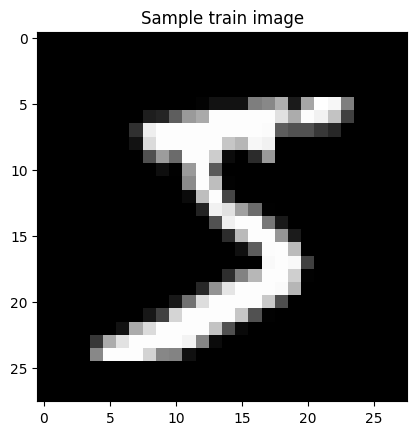

In [4]:
train_images = []
train_true_vals = []

for data in trainset:
    image, true = data
    train_images.append(image)
    train_true_vals.append(true)

test_images = []
test_true_vals = []

for data in testset:
    image, true = data
    test_images.append(image)
    test_true_vals.append(true)

plt.imshow(train_images[0].view(28,28), cmap='gray')
plt.title('Sample train image')

Text(0.5, 1.0, 'Sample test image')

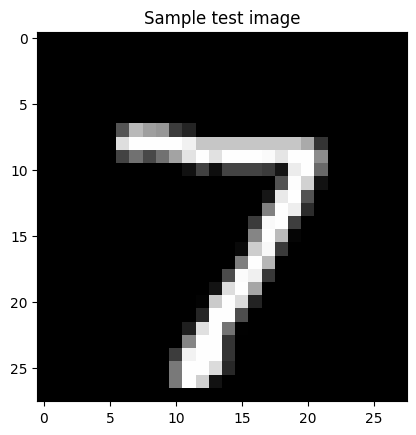

In [5]:
plt.imshow(test_images[0].view(28,28), cmap='gray')
plt.title('Sample test image')

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=trainset, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=testset, shuffle=False)
input_size = 28*28
hidden_units = 20
sample_size = 10
learning_rate = 1e-2            #how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.
batch_size = 100               #the number of data samples propagated through the network before the parameters are updated
epochs = 10                      #the number times to iterate over the dataset

class Net(nn.Module):
    def __init__(self, input_size, hidden_units, sample_size):
        super(Net, self).__init__()
        self.func1 = nn.Linear(input_size,hidden_units)
        self.ReLU = nn.ReLU()
        self.func2 = nn.Linear(hidden_units, sample_size)

    def forward(self, input):
        x = self.func1(input)
        x = self.ReLU(x)
        x = self.func2(x)
        return x

single_hidden_layer = Net(input_size, hidden_units, sample_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(single_hidden_layer.parameters(), lr=learning_rate)


In [7]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.reshape(-1, input_size)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.reshape(-1, input_size)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accuracy = 100*correct
    return accuracy

In [15]:
accuracies_1 = []
for t in range(epochs):
    for batch, (image, label) in enumerate(train_loader):
        image = image.reshape(-1, input_size)
        prediction = single_hidden_layer(image)
        loss = criterion(prediction, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    test_loss, correct = 0, 0
    num_batches = len(train_loader)
    size = len(train_loader.dataset)
    
    with torch.no_grad():
        for image, label in train_loader:
            image = image.reshape(-1, input_size)
            pred = single_hidden_layer(image)
            test_loss += criterion(pred, label).item()
            _, predicted = torch.max(pred.data, 1)
            correct += (predicted == label).sum().item()
    
    test_loss /= num_batches
    correct /= size
    accuracy = 100*correct
    print("Accuracy: ", accuracy,"%, Avg loss: ",test_loss)
    accuracies_1.append(accuracy)

Accuracy:  6.218333333333334 %, Avg loss:  2.309168844906489
Accuracy:  6.218333333333334 %, Avg loss:  2.309168844906489
Accuracy:  6.218333333333334 %, Avg loss:  2.309168844906489
Accuracy:  6.218333333333334 %, Avg loss:  2.309168844906489
Accuracy:  6.218333333333334 %, Avg loss:  2.309168844906489


KeyboardInterrupt: 

In [14]:
x = np.linspace(1,10, 10)
plt.plot(x, accuracies_1)
plt.title('Validation Accuracy over Epochs for One Hidden Layers')

NameError: name 'accuracies_1' is not defined

In [8]:
input_size = 28*28
hidden_units1 = 500
hidden_units2 = 300
sample_size = 10
learning_rate = 1e-2            #how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.
batch_size = 100               #the number of data samples propagated through the network before the parameters are updated
epochs = 40                      #the number times to iterate over the dataset
L2_weight = 0.001

class two_layer_model(nn.Module):
    def __init__(self, input_size, hidden_units1, hidden_units2, sample_size):
        super(two_layer_model, self).__init__()
        self.func1 = nn.Linear(input_size,hidden_units1)
        self.func2 = nn.Linear(hidden_units1, hidden_units2)
        self.ReLU = nn.ReLU()
        self.func3 = nn.Linear(hidden_units2, sample_size)

    def forward(self, input):
        x = self.func1(input)
        x = self.ReLU(x)
        x = self.func2(x)
        x = self.ReLU(x)
        x = self.func3(x)
        return x
    
double_hidden_layer = two_layer_model(input_size, hidden_units1, hidden_units2, sample_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(double_hidden_layer.parameters(), lr=learning_rate, weight_decay=L2_weight)

In [9]:
accuracies_double = []
for t in range(epochs):
    for batch, (image, label) in enumerate(train_loader):
        image = image.reshape(-1, input_size)
        prediction = single_hidden_layer(image)
        loss = criterion(prediction, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    test_loss, correct = 0, 0
    num_batches = len(train_loader)
    size = len(train_loader.dataset)
    with torch.no_grad():
        for image, label in train_loader:
            image = image.reshape(-1, input_size)
            pred = single_hidden_layer(image)
            test_loss += criterion(pred, label).item()
            _, predicted = torch.max(pred.data, 1)
            correct += (predicted == label).sum().item()
    
    test_loss /= num_batches
    correct /= size
    accuracy = 100*correct
    print("Accuracy: ", accuracy,"%, Avg loss: ",test_loss)
    accuracies_double.append(accuracy)

KeyboardInterrupt: 

In [12]:
import torch.optim as optim

# Hyperparameters 
hidden_size_1 = 500  # Size of the first hidden layer
hidden_size_2 = 300  # Size of the second hidden layer
num_classes = 10
num_epochs = 40  # Train for more epochs
batch_size = 100
learning_rate = 0.05
weight_decay = 0.001  # L2 regularization strength
# Fully connected neural network with two hidden layers
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_size_2, num_classes)  # Output layer

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)  # Pass through the second hidden layer
        out = self.relu(out)
        out = self.fc3(out)
        return out

# Model, loss function, optimizer (with L2 regularization)
model = NeuralNet2(input_size, hidden_size_1, hidden_size_2, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [13]:
# Tracking accuracy and loss
accuracy_history2 = []
loss_history2 = []

# Training Loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation accuracy after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * (correct / total)
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}, Validation Accuracy: {accuracy:.2f}%')
    accuracy_history2.append(accuracy)
    loss_history2.append(loss.item())   

Epoch: 1, Loss: 0.0000, Validation Accuracy: 88.67%
Epoch: 2, Loss: 0.0042, Validation Accuracy: 93.75%


KeyboardInterrupt: 